# importing libraries

In [1]:
import pandas as pd 
import os
import pandas_datareader
import streamlit as st 
import pandas_datareader.data as web
import yfinance as yf 
import datetime as dt 
import numpy as np
from pandas_datareader import data, wb
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

check yfinance dire 

In [2]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

###Download one Ticker using yfinance

In [3]:
BAC = yf.Ticker('BAC')
BAC

yfinance.Ticker object <BAC>

In [4]:
#data = BAC.history()
#data.head()
hist = BAC.history(period = 'max')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-02-21 00:00:00-05:00,1.542559,1.542559,1.542559,1.542559,99200,0.0,0.0
1973-02-22 00:00:00-05:00,1.547770,1.547770,1.547770,1.547770,47200,0.0,0.0
1973-02-23 00:00:00-05:00,1.542559,1.542559,1.542559,1.542559,133600,0.0,0.0
1973-02-26 00:00:00-05:00,1.542559,1.542559,1.542559,1.542559,24000,0.0,0.0
1973-02-27 00:00:00-05:00,1.542559,1.542559,1.542559,1.542559,41600,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-18 00:00:00-05:00,45.139999,45.430000,43.349998,43.500000,41771900,0.0,0.0
2024-12-19 00:00:00-05:00,43.970001,44.480000,43.310001,43.380001,38583600,0.0,0.0
2024-12-20 00:00:00-05:00,43.200001,44.400002,43.099998,44.169998,74222200,0.0,0.0


In [5]:
BAC.splits

Date
1986-11-21 00:00:00-05:00    2.0
1997-02-28 00:00:00-05:00    2.0
2004-08-30 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64

In [6]:
start = dt.datetime(2012, 12, 20)
end = dt.datetime(2024, 12, 20)

In [7]:
data = BAC.history(interval = '1d', start = '2012-12-20', end = '2024-12-20')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-12-20 00:00:00-05:00,8.920102,9.257619,8.904029,9.257619,184449000,0.0,0.0
2012-12-21 00:00:00-05:00,9.000465,9.121007,8.936176,9.072790,244892300,0.0,0.0
2012-12-24 00:00:00-05:00,9.056717,9.072789,9.008500,9.040645,50657100,0.0,0.0
2012-12-26 00:00:00-05:00,9.072789,9.346017,9.056717,9.273692,146097900,0.0,0.0
2012-12-27 00:00:00-05:00,9.370125,9.394233,9.024571,9.217439,210411400,0.0,0.0


In [8]:
#symbols = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
#for i in range(6):
    #symbols[i] = data.DataReader(symbols[i], 'yfinance', start, end)
    
tickers = ('BAC', 'C', 'GS', 'JPM', 'MS', 'WFC')

In [9]:
#symbols = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
#tickers = ('BAC', 'C', 'GS', 'JPM', 'MS', 'WFC')
#tickers = yf.Tickers(symbols)
    


In [10]:
#bank_stocks = tickers.history(start = '2012-12-20', end = '2024-12-20')
#bank_stocks.head()

In [11]:
bank_stocks = yf.download(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], period='1mo')
bank_stocks.head()

[*********************100%***********************]  6 of 6 completed


Price       Adj Close                                                 \
Ticker            BAC          C          GS         JPM          MS   
Date                                                                   
2024-11-25  47.237236  70.750000  600.057312  250.289993  133.660004   
2024-11-26  47.485851  69.750000  602.515137  249.970001  131.279999   
2024-11-27  47.505741  70.160004  602.445435  249.789993  131.210007   
2024-11-29  47.247177  70.870003  605.570007  249.720001  131.610001   
2024-12-02  46.779781  71.389999  601.710022  246.250000  131.029999   

Price                      Close                                     ...  \
Ticker            WFC        BAC          C          GS         JPM  ...   
Date                                                                 ...   
2024-11-25  76.900002  47.500000  70.750000  603.030029  250.289993  ...   
2024-11-26  77.349998  47.750000  69.750000  605.500000  249.970001  ...   
2024-11-27  77.209999  47.770000  70.160004  605.429993  249.789993  ...   
2024-11-29  76.169998  47.509998  70.870003  608.570007  249.720001  ...   
2024-12-02  75.279999  47.040001  71.389999  601.710022  246.250000  ...   

Price             Open                                       Volume            \
Ticker              GS         JPM          MS        WFC       BAC         C   
Date                                                                            
2024-11-25  608.789978  249.589996  135.440002  76.199997  42718600  19558100   
2024-11-26  600.130005  250.490005  130.750000  77.500000  30301500  11605200   
2024-11-27  607.679993  249.350006  131.490005  77.370003  23278400   9736100   
2024-11-29  609.309998  249.860001  132.279999  77.690002  23262000   8606500   
2024-12-02  608.000000  249.550003  132.300003  76.949997  35891500  11932600   

Price                                             
Ticker           GS       JPM       MS       WFC  
Date                                              
2024-11-25  2940800  10295400  8012300  28636600  
2024-11-26  2846500   6212100  8817300  19139100  
2024-11-27  1424500   5472300  5507800  19793900  
2024-11-29  1170200   5494800  4068200   9785000  
2024-12-02  1804100   8899700  5512100  18274500  

[5 rows x 36 columns]

In [12]:
bank_stocks = yf.download(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start='2012-12-20', end='2024-12-20', group_by='tickers')
bank_stocks.head()

[*********************100%***********************]  6 of 6 completed


Ticker        BAC                                                    GS  \
Price        Open   High    Low  Close Adj Close     Volume        Open   
Date                                                                      
2012-12-20  11.10  11.52  11.08  11.52  9.257619  184449000  127.349998   
2012-12-21  11.20  11.35  11.12  11.29  9.072790  244892300  126.629997   
2012-12-24  11.27  11.29  11.21  11.25  9.040645   50657100  127.870003   
2012-12-26  11.29  11.63  11.27  11.54  9.273692  146097900  128.160004   
2012-12-27  11.66  11.69  11.23  11.47  9.217439  210411400  127.550003   

Ticker                                          ...        JPM             \
Price             High         Low       Close  ...        Low      Close   
Date                                            ...                         
2012-12-20  129.720001  126.620003  129.720001  ...  43.410000  44.529999   
2012-12-21  128.949997  125.629997  128.440002  ...  43.340000  44.000000   
2012-12-24  128.500000  127.400002  127.540001  ...  43.709999  43.919998   
2012-12-26  129.300003  127.110001  127.160004  ...  43.720001  43.959999   
2012-12-27  128.300003  124.570000  126.669998  ...  42.900002  43.630001   

Ticker                                  MS                               \
Price       Adj Close    Volume       Open       High    Low      Close   
Date                                                                      
2012-12-20  31.999361  25014900  19.049999  19.400000  19.00  19.270000   
2012-12-21  31.618502  38973500  18.740000  19.080000  18.57  18.920000   
2012-12-24  31.561012   8621200  18.900000  18.980000  18.82  18.950001   
2012-12-26  31.589750  11498900  19.020000  19.110001  18.84  18.879999   
2012-12-27  31.352608  19567000  18.940001  19.070000  18.50  18.770000   

Ticker                           
Price       Adj Close    Volume  
Date                             
2012-12-20  14.419317  19134000  
2012-12-21  14.157419  21669400  
2012-12-24  14.179868   3205700  
2012-12-26  14.127491   9052900  
2012-12-27  14.045175  14656100  

[5 rows x 36 columns]

Set the column name levels:

In [13]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [14]:
bank_stocks.head(3)

Bank Ticker    BAC                                                    GS  \
Stock Info    Open   High    Low  Close Adj Close     Volume        Open   
Date                                                                       
2012-12-20   11.10  11.52  11.08  11.52  9.257619  184449000  127.349998   
2012-12-21   11.20  11.35  11.12  11.29  9.072790  244892300  126.629997   
2012-12-24   11.27  11.29  11.21  11.25  9.040645   50657100  127.870003   

Bank Ticker                                      ...        JPM             \
Stock Info         High         Low       Close  ...        Low      Close   
Date                                             ...                         
2012-12-20   129.720001  126.620003  129.720001  ...  43.410000  44.529999   
2012-12-21   128.949997  125.629997  128.440002  ...  43.340000  44.000000   
2012-12-24   128.500000  127.400002  127.540001  ...  43.709999  43.919998   

Bank Ticker                              MS                           \
Stock Info   Adj Close    Volume       Open   High    Low      Close   
Date                                                                   
2012-12-20   31.999361  25014900  19.049999  19.40  19.00  19.270000   
2012-12-21   31.618502  38973500  18.740000  19.08  18.57  18.920000   
2012-12-24   31.561012   8621200  18.900000  18.98  18.82  18.950001   

Bank Ticker                       
Stock Info   Adj Close    Volume  
Date                              
2012-12-20   14.419317  19134000  
2012-12-21   14.157419  21669400  
2012-12-24   14.179868   3205700  

[3 rows x 36 columns]

Exploratory Data Analysis(EDA)

The dataframe looks to be in place so let's begin with our exploration

Start by finding the max close price for each bank's stock during this period.

What is the max Close price for each bank's stock throughout the time period?

In [15]:
for i in tickers:
    print(i, '\t',bank_stocks[i]['Close'].max())

BAC 	 49.380001068115234
C 	 81.91000366210938
GS 	 608.5700073242188
JPM 	 250.2899932861328
MS 	 134.99000549316406
WFC 	 77.3499984741211


In [16]:
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').max() # Another method

Bank Ticker
BAC     49.380001
GS     608.570007
WFC     77.349998
C       81.910004
JPM    250.289993
MS     134.990005
dtype: float64

From our data, it looks like the highest close over this period was Goldman Sachs at 608.570007.

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

In [17]:
#$$ \r{0}^{\infty} e^{-x^2} dx = \frac{\sqrt{\pi}}{2} $$

#$$ [r_t] = [{p_t} - p_{t-1}] / [{p_{t-1}}] = [{p_t}] / [{p_{t-1}}] - 1 $$



When looking at stocks, though, I also interested in the return (the percent change) of the stocks. Let's make a dataframe that represents this for each bank.

In [18]:
returns = pd.DataFrame()

In [19]:
percentage = bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').pct_change()
percentage.head()

Bank Ticker,BAC,GS,WFC,C,JPM,MS
Date,,,,,,
2012-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-21,-0.019965,-0.009867,-0.016543,-0.016928,-0.011902,-0.018163
2012-12-24,-0.003543,-0.007007,-0.001740,-0.002786,-0.001818,0.001586
2012-12-26,0.025778,-0.002979,-0.002615,0.004317,0.000911,-0.003694
2012-12-27,-0.006066,-0.003853,-0.004369,-0.007585,-0.007507,-0.005826


In [20]:
for i in tickers:
    returns[i+' Return'] = percentage[i] # = bank_stocks[i]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2012-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-21,-0.019965,-0.016928,-0.009867,-0.011902,-0.018163,-0.016543
2012-12-24,-0.003543,-0.002786,-0.007007,-0.001818,0.001586,-0.001740
2012-12-26,0.025778,0.004317,-0.002979,0.000911,-0.003694,-0.002615
2012-12-27,-0.006066,-0.007585,-0.003853,-0.007507,-0.005826,-0.004369


In [21]:
percentage = bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').pct_change()
returns['BAC Return'].idxmax()

Timestamp('2020-03-13 00:00:00')

Now let's look at this data together using a seaborn pairplot to quickly plot the returns against each other and get distribution plots. I should see that the data roughly moves in a positive linear line (higher the return in one bank, higher the return in another because they share the same industry - this is of course unless one significantly outperforms the rest.)

Create a pairplot using seaborn of the returns dataframe.

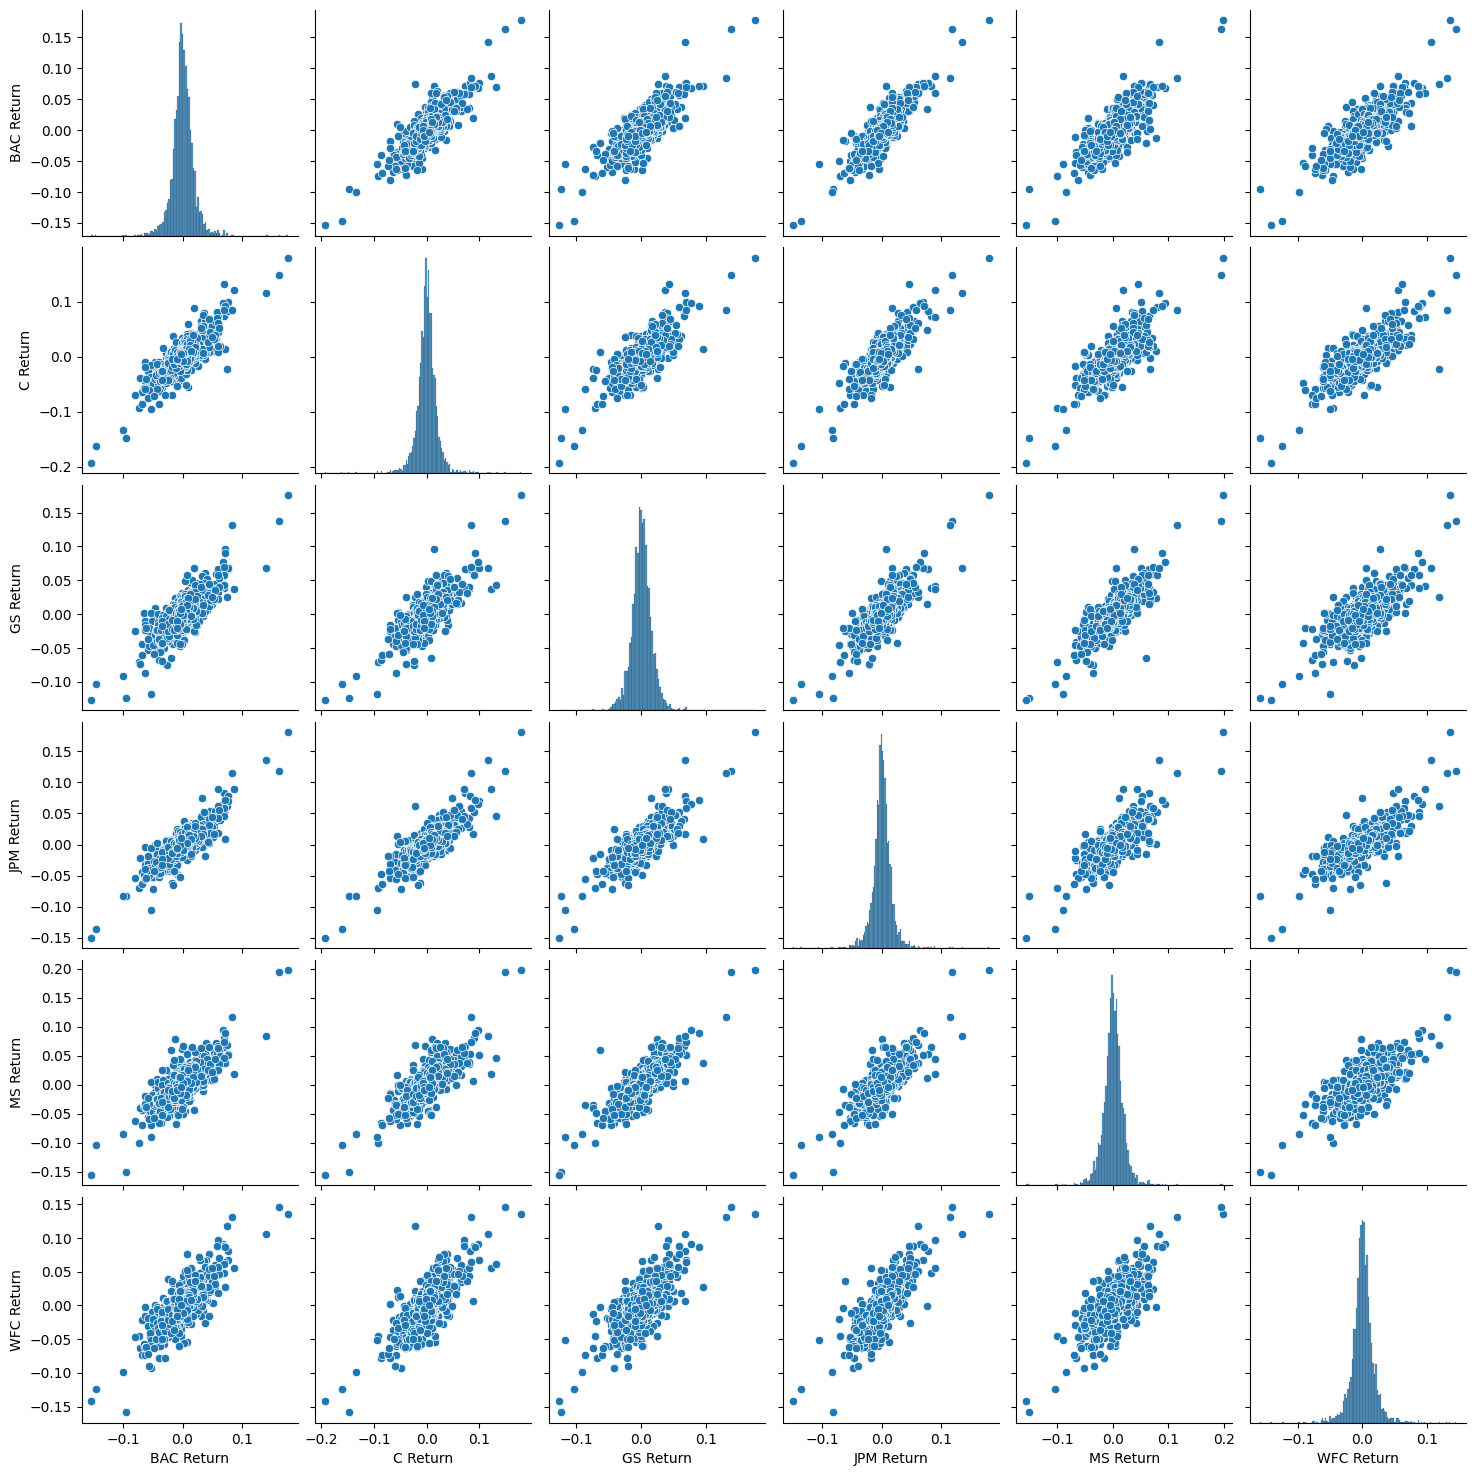

In [22]:
sns.pairplot(returns.iloc[1:,:]) # We can skip first row since they are all NaN's

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [23]:
print('Bank Ticker','\t','Min Return Date','\t\t','Max Return Date','\n')
for i in tickers:
    max = returns[i+' Return'].idxmax()
    min = returns[i+' Return'].idxmin()
    print(i,'\t\t',min,'\t\t',max,'\n')

Bank Ticker 	 Min Return Date 		 Max Return Date 

BAC 		 2020-03-16 00:00:00 		 2020-03-13 00:00:00 

C 		 2020-03-16 00:00:00 		 2020-03-13 00:00:00 

GS 		 2020-03-16 00:00:00 		 2020-03-13 00:00:00 

JPM 		 2020-03-16 00:00:00 		 2020-03-13 00:00:00 

MS 		 2020-03-16 00:00:00 		 2020-03-13 00:00:00 

WFC 		 2020-03-12 00:00:00 		 2020-03-24 00:00:00 



In [24]:
print('Bank Ticker','\t','Min')
returns.idxmin()

Bank Ticker 	 Min


BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [25]:
print('Bank Ticker','\t','Max')
returns.idxmax()

Bank Ticker 	 Max


BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?

In [26]:
returns.std()

BAC Return    0.018827
C Return      0.019693
GS Return     0.017328
JPM Return    0.016460
MS Return     0.019146
WFC Return    0.018482
dtype: float64

Take a look at the standard deviation of the returns COVID-19 pandemic in the United States which stock would you classify as the riskiest over the entire time period?

In [27]:
returns.loc['2020-01-13':'2022-12-31'].std()

BAC Return    0.026202
C Return      0.029088
GS Return     0.023777
JPM Return    0.023977
MS Return     0.025832
WFC Return    0.028436
dtype: float64

Create a distplot using seaborn of the COVID-19 pandemic returns for Morgan Stanley.

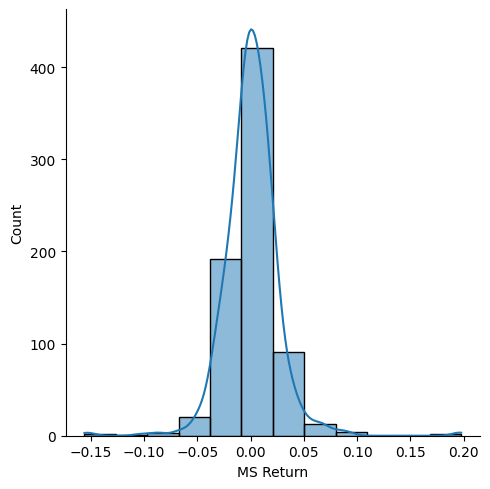

In [28]:
#sns.histplot(returns.loc['2020-01-13':'2022-12-31']['MS Return'], bins=12, kde=True)
sns.displot(returns.loc['2020-01-13':'2022-12-31']['MS Return'], bins=12, kde=True)

** Create a distplot using seaborn of the COVID-19 pandemic returns for CitiGroup **

<Axes: xlabel='C Return', ylabel='Count'>

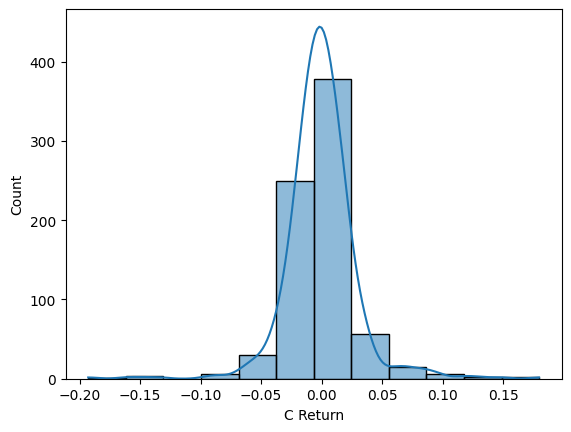

In [29]:
sns.histplot(returns.loc['2020-01-13':'2022-12-31']['C Return'], bins=12, kde=True)


Moving Averages

Let's analyze the moving averages for these stocks in the COVID-19 pandemic.

Plot the rolling average against the Close Price for Bank Of America's stock for the COVID-19 pandemic


In [30]:
#BAC = data.DataReader('BAC', data_source= 'yf', start = '2012-12-20', end = '2024-12-20')
#bac_pandemic = BAC['Close'].loc['2020-01-13':'2022-12-31']
#bac_pandemic.rolling(window=30).mean().plot(label = '30 day average', color='blue') # Plot of 30 day MA in pandemic
#bac_pandemic.plot(label = 'BAC Close', figsize=(15,5), color='green')               # Plot of BAC Close in pandemic
#plt.legend(loc='best')

[*********************100%***********************]  1 of 1 completed


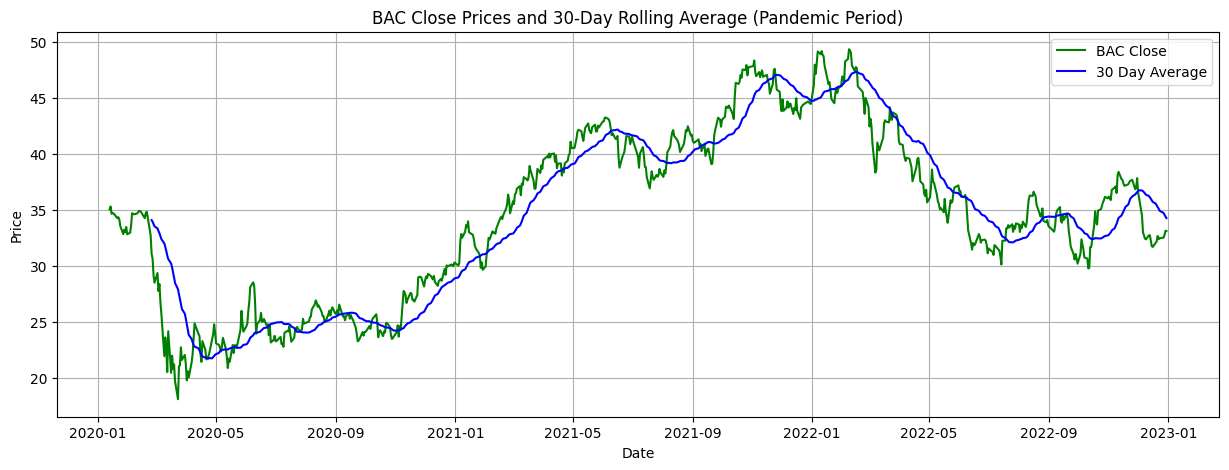

In [31]:
#import yfinance as yf
#import matplotlib.pyplot as plt

# Fetch data for BAC using yfinance
BAC = yf.download('BAC', start='2012-12-20', end='2024-12-20')

# Extract pandemic period data
bac_pandemic = BAC['Close'].loc['2020-01-13':'2022-12-31']

# Calculate 30-day rolling average, dropping NaN values
rolling_avg = bac_pandemic.rolling(window=30).mean()

# Plot BAC Close prices during the pandemic
plt.figure(figsize=(15, 5))
plt.plot(bac_pandemic, label='BAC Close', color='green')

# Plot 30-day rolling average, aligning indices
plt.plot(rolling_avg, label='30 Day Average', color='blue')

# Add legend and title
plt.legend(loc='best')
plt.title('BAC Close Prices and 30-Day Rolling Average (Pandemic Period)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Create a heatmap of the correlation between the stocks Close Price.

In [32]:
import cufflinks as cf
cf.go_offline()  # Enables offline mode for plotting
cf.set_config_file(world_readable=True, theme='pearl')  
import plotly

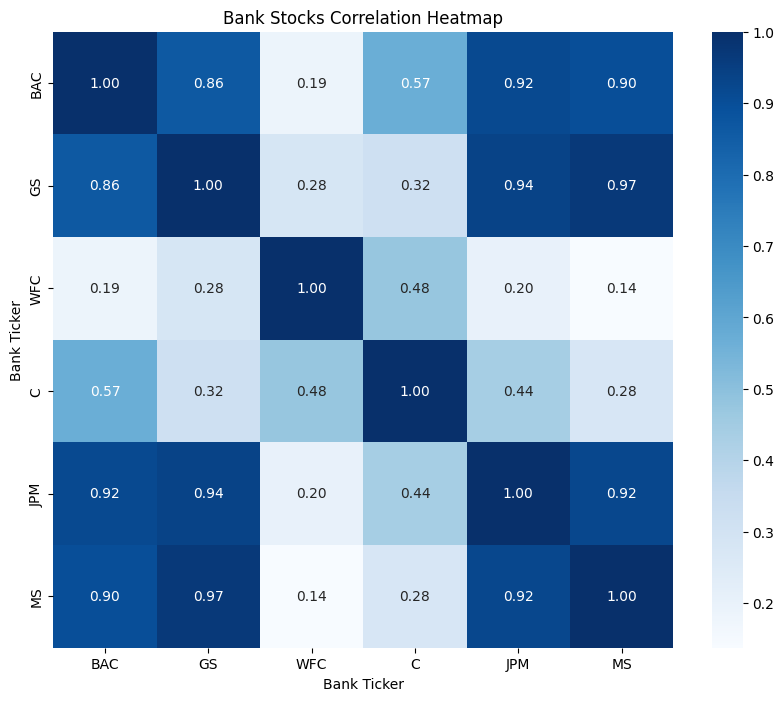

In [33]:
correlations = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Blues', fmt='.2f')
plt.title('Bank Stocks Correlation Heatmap')
plt.show()


In [34]:
#maybe the average magnitude of the stock prices are big enough to skew this
bank_stocks.xs('Close',level=1, axis=1).agg('mean')

Bank Ticker
BAC     26.500891
GS     255.055629
WFC     47.842606
C       56.880424
JPM    107.480589
MS      56.346182
dtype: float64

As we can see, the average stock price for Morgan Stanley (MS) and CitiGroup(C) is more than double the stock price of Bank of America (BAC). Therefore, even if the stock move is highly correlated, the magnitude return percentage of that move would be different due to the different starting magnitudes, leaving the percent returns to being different enough numbers to lower the correlation of the two.

In [35]:
#min single day return % date
returns.dropna().idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [36]:
#max single day return % date
returns.dropna().idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

With the max returns, we notice that all banks essentially bounced back the  some days after COVID-19 pandemic Started. This means that we can't read too much into stock moves because of COVID-19 pandemic, we can only say that stocks are shaky when there is significant COVID-19 pandemic started.

In [37]:
bank_stocks.to_csv('../data/clean/Bank_Finance_Data.csv', index=False) 


Conclusion

By analyzing this set of data, we saw that correlation in closing price didn't mean exact correlation in return % due to magnitude difference of stock price. We also visualized the COVID-19 pandemic downturn for these bank stocks and observed the increased volatility they endured. We found that a stock split by Bank of America created an anomaly that skewed some of our standard deviation results; if we wanted to do more analysis, we could consider accounting for that anomaly by normalizing our data based on market capitalization.